In [1]:
import torch
import torchvision

import sys
sys.path.append('../')
from mnist_code import LoadMNIST
from mnist_code import visualize_mnist

In [2]:
mnist = LoadMNIST()
train, test = mnist.load_raw()

print(len(train), len(test))

60000 10000


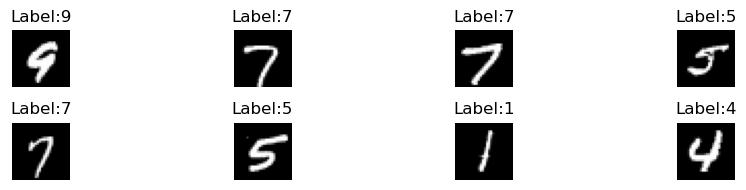

In [11]:
train_loader, test_loader = mnist.load_tensor()


visualize_mnist(train_loader)